<a href="https://colab.research.google.com/github/Geek-a-Byte/ML-sessional/blob/main/lab5/K_NN_SUPERVISED_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSE 442/Knee-Torque-ZDataSet.csv")

In [ ]:
df.tail()

,Body Weight (kg),Body Height (m),Weight-Height Ratio (R),Internal Moment (M),Required Torque (N-m),Torque Category
52,62,1.62,NaN,NaN,9.302,Low
53,65,1.50,NaN,NaN,8.624,Low
54,87,1.87,NaN,NaN,7.012,Very Low
55,77,1.88,NaN,NaN,2.514,Very Low
56,67,1.73,NaN,NaN,20.000,Very High


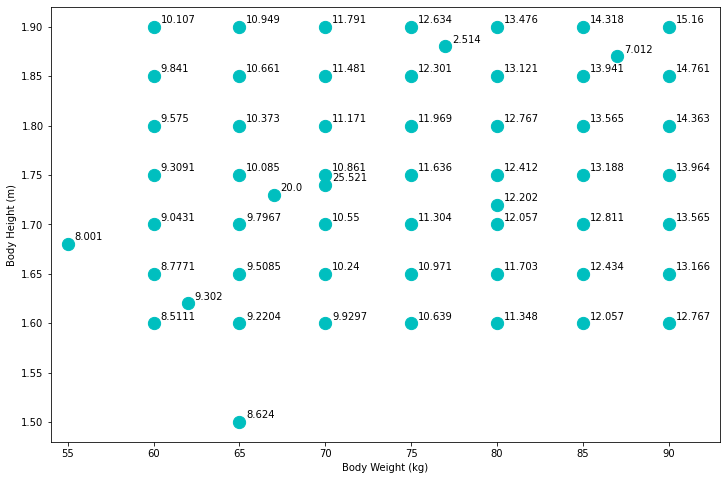

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df["Body Weight (kg)"],df["Body Height (m)"], s=150, c='c')
plt.axis([54,93,1.48,1.92])

plt.xlabel("Body Weight (kg)")
plt.ylabel("Body Height (m)")

w = df["Body Weight (kg)"].to_numpy()
h = df["Body Height (m)"].to_numpy()

i=0
for v in df["Required Torque (N-m)"].to_numpy():
  plt.text(w[i]+.4 ,h[i]+.004, v)
  i+=1

Text(82.4, 1.784, 'New?')

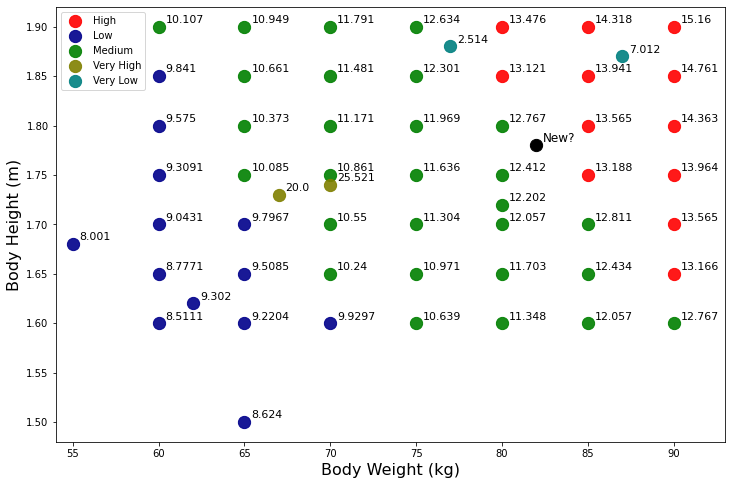

In [ ]:
T_category = df['Torque Category'].values
T_category_ = np.unique(T_category)

COLORS = [ "#FF0000", "#00008b", "#008000", "#808000", "#008080"]
fig, ax = plt.subplots(figsize=(12,8))
plt.axis([54,93,1.48,1.92])
for category, color in zip(T_category_, COLORS):
  idxs = np.where(T_category == category)
  ax.scatter(w[idxs],h[idxs],label=category, s=150, color=color, alpha=0.9)

ax.legend()
font = {'family':'sans serif', 'color': 'black', 'weight':'normal', 'style':'normal','size':11}
i=0
for v in df['Required Torque (N-m)'].to_numpy():
  plt.text(w[i]+.4, h[i]+.004, v, fontdict=font)
  i+=1

font = {'family':'sans serif', 'color': 'black', 'weight':'normal', 'style':'normal','size':16}
ax.set_xlabel("Body Weight (kg)", fontdict=font, fontsize=16)
ax.set_ylabel("Body Height (m)", fontdict=font, fontsize=16)

plt.scatter(82, 1.78, s=150, c="#000000")
plt.text(82+.4, 1.78+0.004, "New?", fontname='sans serif', fontsize=12)

In [ ]:
df.isnull().sum()

Body Weight (kg)           0
Body Height (m)            0
Weight-Height Ratio (R)    8
Internal Moment (M)        8
Required Torque (N-m)      0
Torque Category            0
dtype: int64

In [ ]:
df1=df.dropna()
df1.tail(10)

,Body Weight (kg),Body Height (m),Weight-Height Ratio (R),Internal Moment (M),Required Torque (N-m),Torque Category
39,85,1.80,47.222,1.3841,13.565,High
40,85,1.85,45.946,1.4226,13.941,High
41,85,1.90,44.737,1.4610,14.318,High
42,90,1.60,56.250,1.3027,12.767,Medium
43,90,1.65,54.545,1.3434,13.166,High
44,90,1.70,52.941,1.3841,13.565,High
45,90,1.75,51.429,1.4249,13.964,High
46,90,1.80,50.000,1.4656,14.363,High
47,90,1.85,48.649,1.5063,14.761,High
48,90,1.90,47.368,1.5470,15.160,High


In [ ]:
y = df1['Required Torque (N-m)']
X = df1.drop(['Weight-Height Ratio (R)', 'Internal Moment (M)', 'Required Torque (N-m)', 'Torque Category'], axis=1)

X.describe()

,Body Weight (kg),Body Height (m)
count,49.00000,49.000000
mean,75.00000,1.750000
std,10.10363,0.101036
min,60.00000,1.600000
25%,65.00000,1.650000
50%,75.00000,1.750000
75%,85.00000,1.850000
max,90.00000,1.900000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [ ]:
len(X)
len(X_train)
len(X_test)



13

In [ ]:
X_test

,Body Weight (kg),Body Height (m)
13,65,1.90
45,90,1.75
47,90,1.85
44,90,1.70
17,70,1.75
27,75,1.90
26,75,1.85
25,75,1.80
31,80,1.75
19,70,1.85


In [ ]:
X_test2 = X_test[:1]
X_test2

,Body Weight (kg),Body Height (m)
13,65,1.9


In [ ]:
import sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()
scalar.fit(X_train)
X_t = X_test
X_t2 = X_test2

# scale both X_train and X_test

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
X_test2 = scalar.transform(X_test2)

In [ ]:
col_names = ['Body Weight (kg)', 'Body Height (m)']
scaled_df = pd.DataFrame(X_train, columns= col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Body Weight (kg),36.0,-6.106227e-16,1.014185,-1.452736,-0.959354,0.027410,1.014175,1.507557
Body Height (m),36.0,-9.575674e-16,1.014185,-1.263228,-0.757937,-0.252646,0.757937,1.768519


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

k = 5

regressor = KNeighborsRegressor(n_neighbors=k)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(X_test), print(y_test), print(y_pred)

[[-0.95935428  1.76851903]
 [ 1.50755672  0.25264558]
 [ 1.50755672  1.26322788]
 [ 1.50755672 -0.25264558]
 [-0.46597208  0.25264558]
 [ 0.02741012  1.76851903]
 [ 0.02741012  1.26322788]
 [ 0.02741012  0.75793673]
 [ 0.52079232  0.25264558]
 [-0.46597208  1.26322788]
 [-0.95935428  1.26322788]
 [-1.45273648  0.75793673]
 [ 0.52079232  1.76851903]]
13    10.949
45    13.964
47    14.761
44    13.565
17    10.861
27    12.634
26    12.301
25    11.969
31    12.412
19    11.481
12    10.661
4      9.575
34    13.476
Name: Required Torque (N-m), dtype: float64
[10.6566  13.4186  14.2694  12.7312  10.763   13.1876  12.5582  11.8136
 12.6426  11.2594  10.6566  10.15582 13.6662 ]


(None, None, None)

In [ ]:
y_pred2 = regressor.predict(X_test2)
y_pred2

array([10.6566])

In [ ]:
pred_df = X_t2
pred_df

,Body Weight (kg),Body Height (m)
13,65,1.9


In [ ]:
pred_df['Required Torque (N-m)'] = y_pred2
pred_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Body Weight (kg),Body Height (m),Required Torque (N-m)
13,65,1.9,10.6566


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error (y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.3426938461538461
mse: 0.16938923633846145
rmse: 0.41156923638491427


In [ ]:
regressor.score(X_test, y_test)

0.9171930701625446

In [ ]:
y.describe()

count    49.000000
mean     11.636300
std       1.707826
min       8.511100
25%      10.240000
50%      11.636000
75%      12.811000
max      15.160000
Name: Required Torque (N-m), dtype: float64

In [ ]:
error= []


for i in range (1,30):
  knn = KNeighborsRegressor(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)

  mae = mean_absolute_error(y_test, pred_i)
  error.append(mae)


Text(0, 0.5, 'Mean Absolute Error (MAE)')

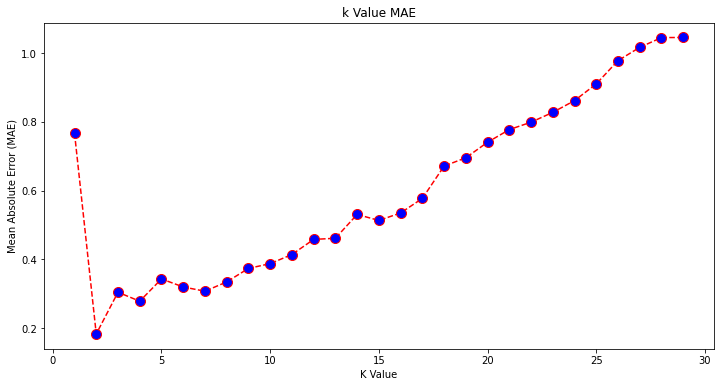

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))

plt.plot(range(1,30), error, color='red',
         linestyle = 'dashed', marker ='o',
         markerfacecolor ='blue', markersize =10)

plt.title('k Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error (MAE)')

In [ ]:
import numpy as np

print(min(error[2:]))
print(np.array(error[2:]).argmin()+2)

K_neigh = np.array(error[2:]).argmin()+2

knn_reg = KNeighborsRegressor(n_neighbors = 4)
knn_reg.fit(X_train, y_train)

y_pred_reg = knn_reg.predict(X_test)

r2_reg = knn_reg.score(X_test, y_test)

mae_reg = mean_absolute_error(y_test, y_pred_reg)
mse_reg = mean_squared_error(y_test, y_pred_reg)
rmse_reg = mean_squared_error(y_test, y_pred_reg, squared=False)

print(f'r2: {r2_reg}, \nmae: {mae_reg} \nmse: {mse_reg} \nrmse:{rmse_reg}')

0.27790576923077
3
r2: 0.939400126902873, 
mae: 0.27790576923077 
mse: 0.12396264716346174 
rmse:0.35208329577453934


In [ ]:
dfc = df.dropna()
dfc = dfc.loc[dfc.index.drop_duplicates()]
# y = dfc['Torque Category']
x = dfc.drop(['Weight-Height Ratio (R)', 'Internal Moment (M)', 
              'Required Torque (N-m)', 'Torque Category'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
y_pred


array(['Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'High',
       'Low', 'Medium', 'High', 'Medium', 'Medium', 'Medium'],
      dtype=object)

In [ ]:
acc = classifier.score(x_test, y_test)
print(acc)

0.9230769230769231


              precision    recall  f1-score   support

        High       1.00      1.00      1.00         4
         Low       1.00      0.50      0.67         2
      Medium       0.88      1.00      0.93         7

    accuracy                           0.92        13
   macro avg       0.96      0.83      0.87        13
weighted avg       0.93      0.92      0.91        13



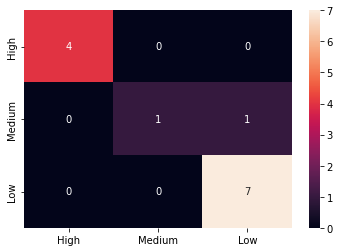

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns


classes_names = ['High', 'Medium','Low']

cm = pd.DataFrame(confusion_matrix(y_test, y_pred),columns = classes_names, index=classes_names)

sns.heatmap(cm, annot= True, fmt='d');

print(classification_report(y_test, y_pred))

Text(0, 0.5, 'F1 Score')

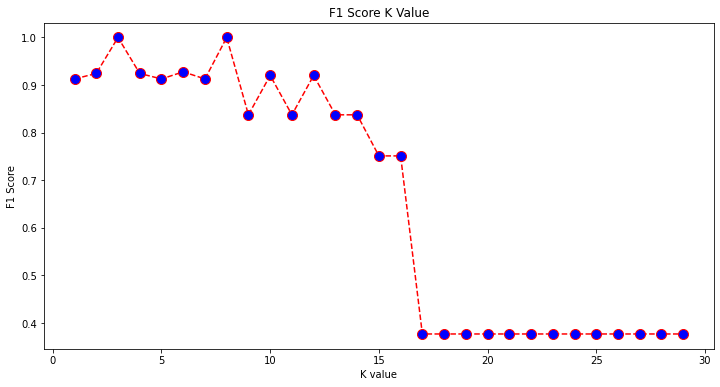

In [ ]:
from sklearn.metrics import f1_score

f1s=[]

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i=knn.predict(x_test)

  f1s.append(f1_score(y_test, pred_i, average ='weighted'))



plt.figure(figsize=(12,6))
plt.plot(range(1,30), f1s, color='red', linestyle ='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('F1 Score K Value')

plt.xlabel('K value')
plt.ylabel('F1 Score')

In [ ]:
np.array(f1s)

array([0.91282051, 0.92439185, 1.        , 0.92439185, 0.91282051,
       0.92781065, 0.91282051, 1.        , 0.83745421, 0.92014652,
       0.83745421, 0.92014652, 0.83745421, 0.83745421, 0.75113122,
       0.75113122, 0.37692308, 0.37692308, 0.37692308, 0.37692308,
       0.37692308, 0.37692308, 0.37692308, 0.37692308, 0.37692308,
       0.37692308, 0.37692308, 0.37692308, 0.37692308])

In [ ]:
classifier7 = KNeighborsClassifier(n_neighbors=7)
classifier7.fit(x_train, y_train)

y_pred7 = classifier7.predict(x_test)

print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         4
         Low       1.00      0.50      0.67         2
      Medium       0.88      1.00      0.93         7

    accuracy                           0.92        13
   macro avg       0.96      0.83      0.87        13
weighted avg       0.93      0.92      0.91        13



In [ ]:
classifier11 = KNeighborsClassifier(n_neighbors=11)
classifier11.fit(x_train, y_train)

y_pred11 = classifier11.predict(x_test)

print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

        High       1.00      0.75      0.86         4
         Low       1.00      0.50      0.67         2
      Medium       0.78      1.00      0.88         7

    accuracy                           0.85        13
   macro avg       0.93      0.75      0.80        13
weighted avg       0.88      0.85      0.84        13



In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5)

nbrs.fit(x_train)


distances, indexes = nbrs.kneighbors(x_train)

distances[:3], distances.shape

(array([[0.        , 0.46999632, 0.50415026, 0.68924888, 0.68924888],
        [0.        , 0.46999632, 0.50415026, 0.68924888, 0.68924888],
        [0.        , 0.46999632, 0.50415026, 0.50415026, 0.68924888]]),
 (36, 5))

In [ ]:
indexes[:3], indexes[:3].shape

(array([[ 0,  6, 18, 11, 15],
        [ 1,  5, 13, 24,  3],
        [ 2, 34,  7, 33, 15]]), (3, 5))

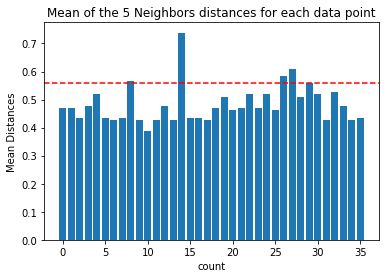

In [ ]:
from sklearn.metrics.pairwise import distance_metrics
dist_means = distances.mean(axis=1)

plt.bar(np.array(range(0,36)), dist_means)

plt.title('Mean of the 5 Neighbors distances for each data point')
plt.xlabel('count')
plt.ylabel('Mean Distances')

plt.axhline(y=0.56, color ='r', linestyle = '--')

In [ ]:
import numpy as np

outlier_index = np.where(dist_means>0.56)
outlier_index

(array([ 8, 14, 26, 27]),)

In [ ]:
outlier_values = df1.iloc[outlier_index]
outlier_values

,Body Weight (kg),Body Height (m),Weight-Height Ratio (R),Internal Moment (M),Required Torque (N-m),Torque Category
8,65,1.65,39.394,0.97026,9.5085,Low
14,70,1.60,43.750,1.01320,9.9297,Low
26,75,1.85,40.541,1.25520,12.3010,Medium
27,75,1.90,39.474,1.28920,12.6340,Medium
